<h1>Project: Investigate a Dataset (FBI Gun Data)</h1>

<h2>Table Of Contents</h2>
<ul>
<li><a href="#intro" style="text-decoration: none; font-weight:bold; color:#444;">Introduction</a></li>
<li><a href="#wrangling" style="text-decoration: none; font-weight:bold; color:#444;">Data Wrangling</a></li>
<li><a href="#eda" style="text-decoration: none; font-weight:bold; color:#444;">Exploratory Data Analysis</a></li>
<li><a href="#conclusions" style="text-decoration: none; font-weight:bold; color:#444;">Conclusions</a></li>
</ul>

<a id='intro'></a>

<h2>Introduction</h2>


<p> 
    <i>Welcome to the Investigation project!</i> The data comes from the FBI's National Instant Criminal (NICS) Background Check System; it is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.
</p>
<p>
    The data has been supplemented with state level data from <a href="https://census.gov/" style="text-decoration: none; font-weight:bold; color:#444;">census</a>.
    <br>
    ● The NICS data is found in one sheet of an <i>.xlsx file</i>; It contains the number of firearm checks by month, state, and type.
    <br>
    ● The U.S. census data is found in a <i>.csv file</i>; It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.
</p>

<h2>Questions</h2>
<ol>
    <li>Which state has the highest permits (registrations), (July 1, 2016), compare it with other states?</li>
    <li>What is the trend for each state in USA?</li>
    <li>What is the overall trend of gun purchases?</li>
    <li>What are the gun types that have the highest and lowest purchasing amount?</li>
    <li>Which state has the highest percent of people under 18 years, (July 1, 2016), compare it with other states?</li>
    <li>Which state has the lowest and highest percent for the females, (July 1, 2016), compare it with other states?</li>
    <li>Which state has the highest percent of Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015, compare it with other states?</li>
    <li>What is the total annual payroll for all states, 2015 ($1,000)?</li>
    <li>What is the highest total employment, 2015?</li>
    <li>What are the highest population per square mile, 2010 for all states compared to each other?</li>
    <li>What census data is most associated with high gun per capita?</li>
    
</ol>
<p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

census = pd.read_csv('U.S. Census Data.csv', sep =',')
gun = pd.read_excel('gun_data.xlsx')

<a id='wrangling'></a>
<h2>Data Wrangling</h2>

> **Abstract**: In this section of the report, I will load the data, check for cleanliness, and then trim and clean dataset for analysis.

<h3>General Properties</h3>
<h4>Gun Dataset Overview</h4>

In [2]:
# Check data type to look for instances of missing or possibly errant data.
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [3]:
# Check if there is any duplicated rows.
sum(gun.duplicated())

0

<p>
    Based on the information that appeared as a result of info function for gun data, the number of rows for gun data is 12485 with a 27 columns.
</p>

<ol>
    <li>There are several columns (4 columns) with 12485 entries, and there are a lot of missing values in many columns (23 columns); for the missing values it will be replaced by the mean of each column.</li>
    <li>There is no duplicated value.</li>
    <li>Now for data types; data should be converted to be integer as the unit of the counted sample can not be counted as 0.5.</li>
</ol>

<h4>Census Dataset Overview</h4>

In [4]:
# Check data type to look for instances of missing or possibly errant data.
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

To check the exact type of object:

In [5]:
type(census['Wyoming'][0])

str

In [6]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


I noticed NAN values within the fact note column, to check them:

In [7]:
sum(census['Fact Note'].isnull())

57

In [8]:
# Check if there is any duplicated rows.
sum(census.duplicated())

3

<p>
    Based on the information that appeared as a result of info function for census data, the number of rows for census data is 85 with a 52 columns.
</p>
<ol>
    <li>All of the columns have missing values; for the missing values it will be replaced by the mean of each column, add for that from the head function result I found Nan values,'Fact Note' has 57 NAN value, these must be removed to reduce the missing values for census data.</li>
    <li>There are 3 duplicated values.</li>
    <li>Now for data types; the data type of the state columns is string, but actually contain number and percentage. The string data needed to be converted into numeric type.</li>
</ol>

<a id='wrangling'></a>
<h3>Data Cleaning</h3>
<ol>
    <li>Replace the NAN field with mean of each column for gun data.</li>
    <li>Drop fact Note column since it is not used and will affect groupby function.</li>
    <li>Convert data type from string to float for all the state column in Census data.</li>
    <li>Extract year and months column based on month in Gun data.</li>
</ol>


<h4>Cleaning Gun Data Set</h4>

In [9]:
#1 The Nan fields 
gun.fillna(gun.mean(), axis=0, inplace=True)

In [10]:
# Check the result, it must return 0 after the doing the pre-line code
gun.isnull().sum().sum()

0

In [11]:
#3 Convert data type from string to float for all the state column in Census data. 
cols = ['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other']

gun[cols] = gun[cols].applymap(np.int64)

In [12]:
#4 Extract year and months column based on month in Gun data.
gun['year']=gun['month'].apply(lambda x: x.split("-")[0]).astype(int)
gun['year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998], dtype=int64)

In [13]:
gun['months'] = gun['month'].apply(lambda x: x.split("-")[1]).astype(int)
gun['months'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10], dtype=int64)

In [14]:
gun.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,2017,9
1,2017-09,Alaska,209,2,2320,2930,219,160,0,5,...,0,17,24,1,0,0,0,6303,2017,9
2,2017-09,Arizona,5069,382,11063,7946,920,631,0,13,...,0,38,12,2,0,0,0,28394,2017,9


<h4>Cleaning Census Data Set</h4>

In [15]:
census.drop_duplicates(inplace=True)
sum(census.duplicated())

0

In [16]:
# Change column name in df1 into lower case for the convenience of analysis
# Confirm changes

census.rename(columns = lambda x: x.lower(), inplace = True)
census.head()

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [17]:
# As the NaN values are of string type therefore thty can't treated by filling with means 
# since they don't affect the arithmetic calculation nor satistical analysis
# so it is better to replace those NaN values with a common string type value which doesn't indicate anything
# For the numerical type of NaN, as each row has specific meaning, thus we can't fill them with mean

# As for df, numericial type of data was mispresented as string type, thus first task is to convert them into float
# Skip the first 2 columns as they should be string type, so leave them unchanged

col = census.iloc[:,2:].columns
for c in col:
    census[c] = census[c].str.extract('(\d+)').astype(float)
    
# comfirm changes
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 84
Data columns (total 52 columns):
fact              80 non-null object
fact note         28 non-null object
alabama           65 non-null float64
alaska            64 non-null float64
arizona           65 non-null float64
arkansas          65 non-null float64
california        65 non-null float64
colorado          65 non-null float64
connecticut       65 non-null float64
delaware          65 non-null float64
florida           65 non-null float64
georgia           65 non-null float64
hawaii            64 non-null float64
idaho             65 non-null float64
illinois          65 non-null float64
indiana           65 non-null float64
iowa              65 non-null float64
kansas            65 non-null float64
kentucky          65 non-null float64
louisiana         65 non-null float64
maine             64 non-null float64
maryland          65 non-null float64
massachusetts     65 non-null float64
michigan          64 non-

In [18]:
# Replace the all NaN in df with 'No Record' 

census.fillna('No record', inplace = True)

# Confirm changes 

census.isnull().any()

fact              False
fact note         False
alabama           False
alaska            False
arizona           False
arkansas          False
california        False
colorado          False
connecticut       False
delaware          False
florida           False
georgia           False
hawaii            False
idaho             False
illinois          False
indiana           False
iowa              False
kansas            False
kentucky          False
louisiana         False
maine             False
maryland          False
massachusetts     False
michigan          False
minnesota         False
mississippi       False
missouri          False
montana           False
nebraska          False
nevada            False
new hampshire     False
new jersey        False
new mexico        False
new york          False
north carolina    False
north dakota      False
ohio              False
oklahoma          False
oregon            False
pennsylvania      False
rhode island      False
south carolina  

In [19]:
census.head()

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",No record,4,741,6,2,39,5,3,952,...,865454,6.65119e+06,27,3,624,8,7,1,5,585
1,"Population estimates base, April 1, 2010, (V2...",No record,4,710,6,2,37,5,3,897,...,814195,6.3463e+06,25,2,625,8,6,1,5,563
2,"Population, percent change - April 1, 2010 (es...",No record,1,4,8,2,5,10,0,6,...,0,0,10,10,0,5,8,1,1,3
3,"Population, Census, April 1, 2010",No record,4,710,6,2,37,5,3,897,...,814180,6.34610e+06,25,2,625,8,6,1,5,563
4,"Persons under 5 years, percent, July 1, 2016, ...",No record,6,7,6,6,6,6,5,5,...,0,0,7,8,4,6,6,5,5,6


<a id='eda'></a>
<h3>Exploratory Data Analysis</h3>

<p>
    Now after I trimmed and cleaned the data, we will move on to exploration.
    I will Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.
    I follow it up by looking at relationships between variables.
</p>
<h4>Research Question 1: <i>Which state has the highest permits (registrations), (July 1, 2016), compare it with other states?</i></h4>

In [20]:
# Generate a temporary table for 2016-07
temp_201607=gun.loc[gun['month'] == '2016-07']

In [21]:
# Get the state that have the max value across the prevoius table
temp_201607.loc[temp_201607['permit'].idxmax(),['state', 'permit']]

state     Kentucky
permit      342858
Name: 788, dtype: object

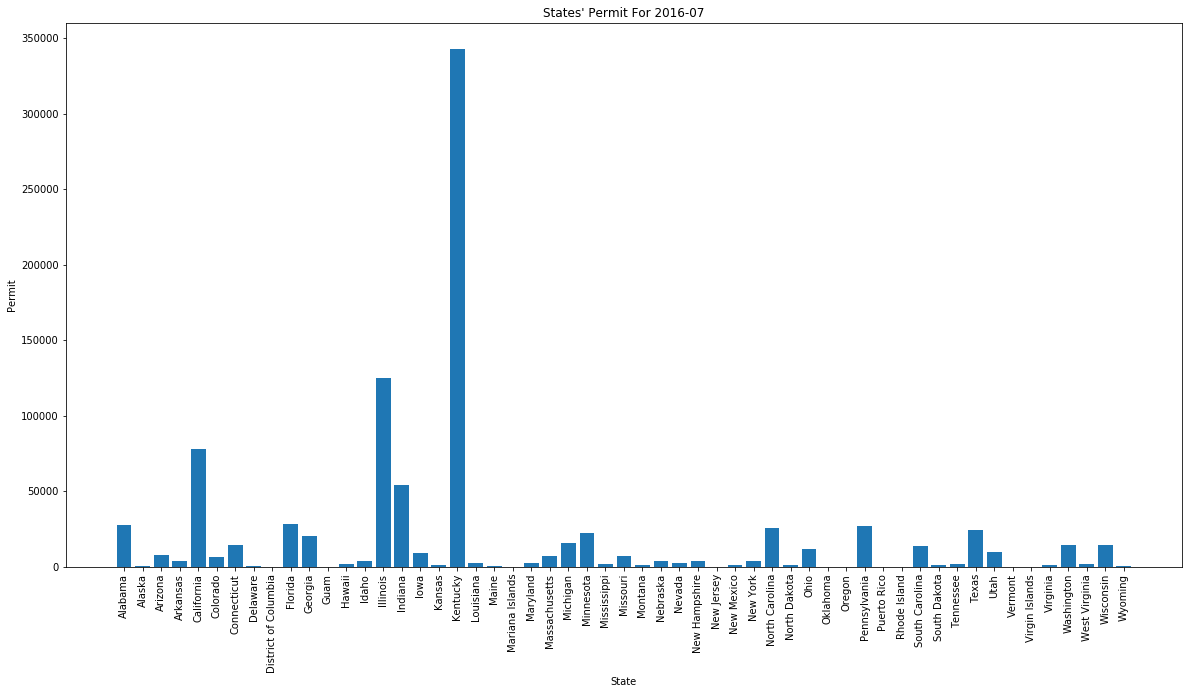

In [22]:
# Comparing it to other states for the same time

plt.subplots(figsize=(20,10))
plt.bar(temp_201607['state'],temp_201607['permit']);
plt.title("States' Permit For 2016-07")

# Set x and y axis lable name
plt.xlabel('State')
plt.ylabel('Permit')

# Set bar name for each state
plt.xticks(rotation=90,horizontalalignment='center',fontweight='light',fontsize='medium')

plt.show()

> **Findings**: after running the previous functions we found that Kentucky have the highest permit in 2016-07; the results showed a frightening comparison of Kentucky with other states over the period!


<h4>Research Question 2: <i>What is the trend for each state in USA?</i></h4>

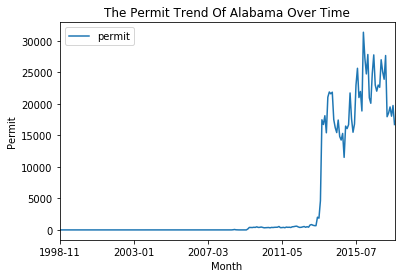

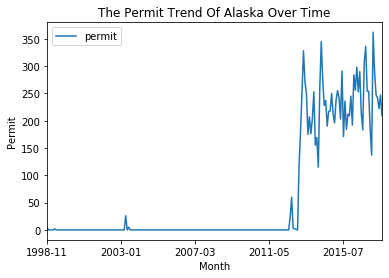

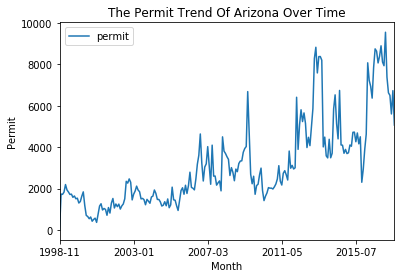

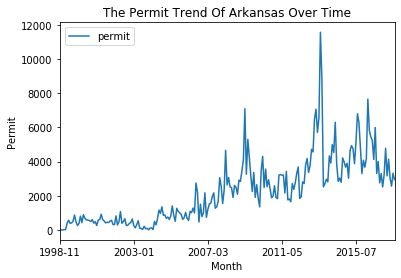

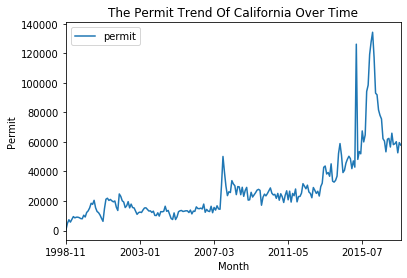

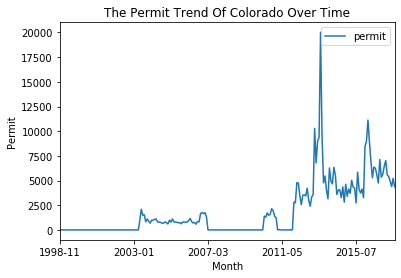

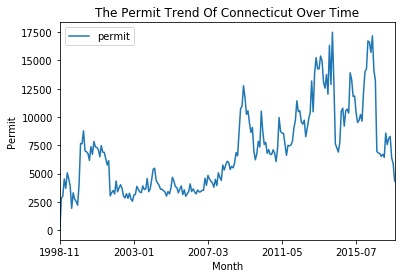

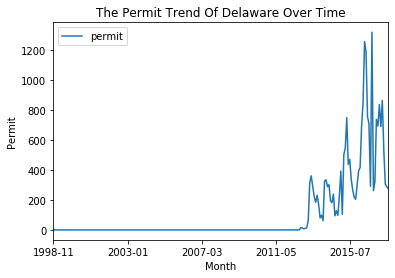

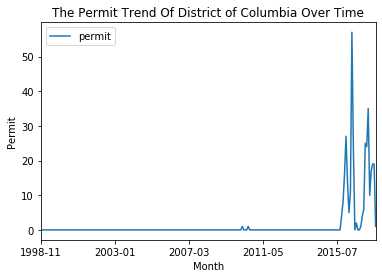

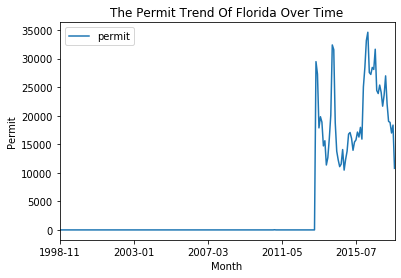

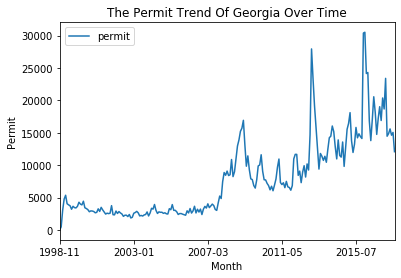

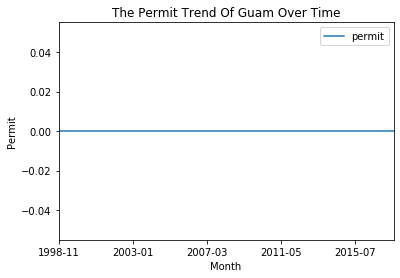

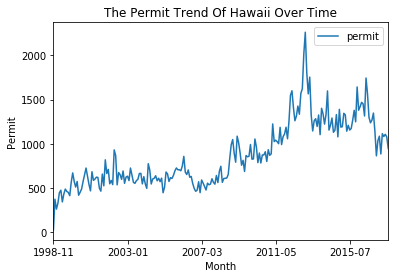

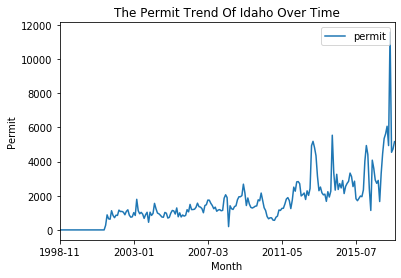

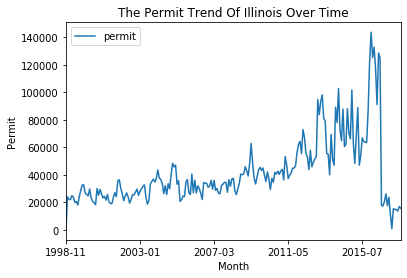

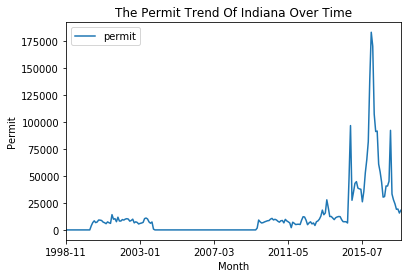

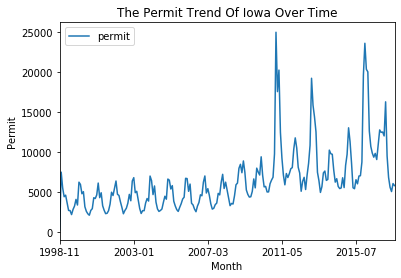

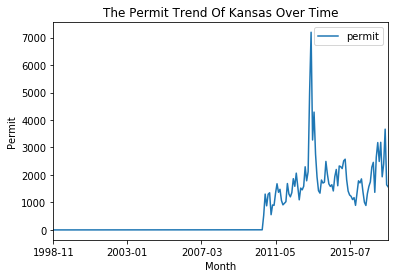

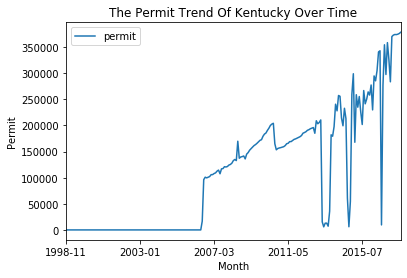

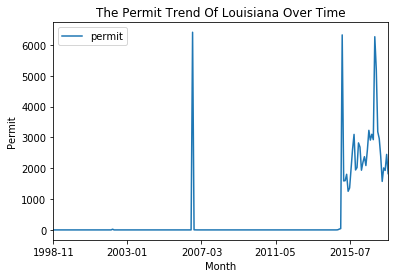

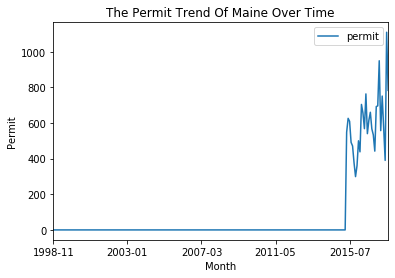

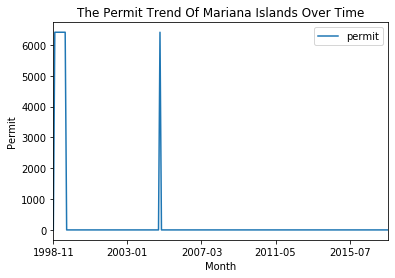

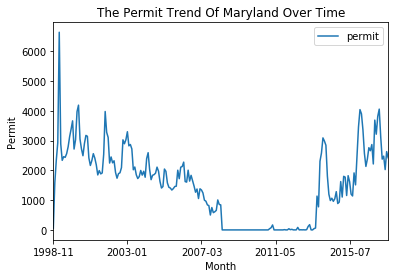

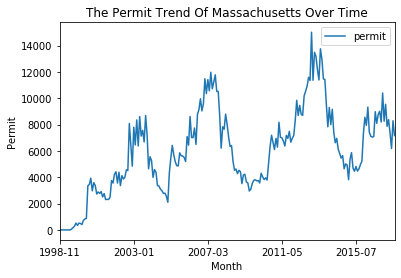

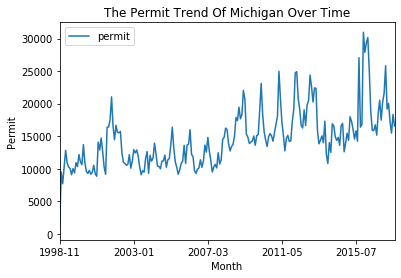

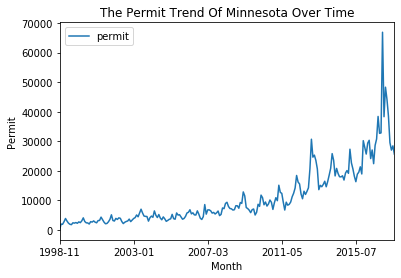

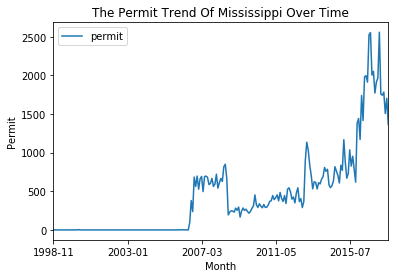

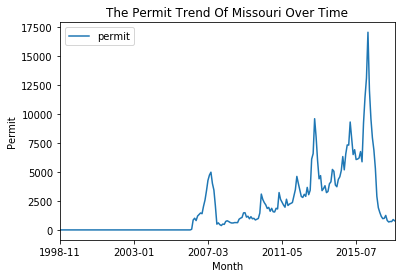

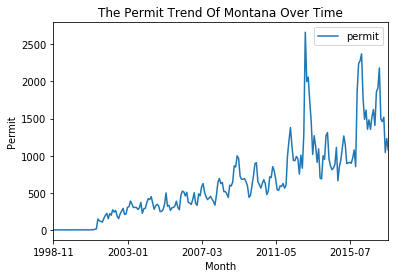

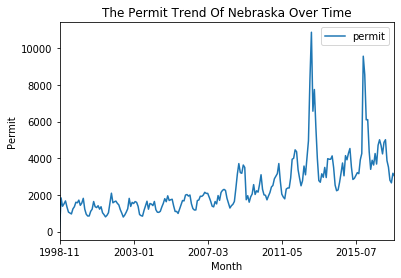

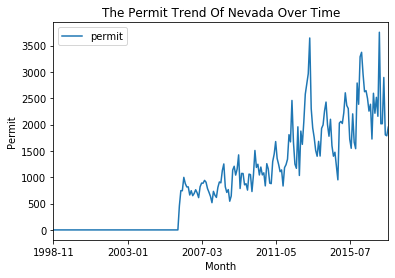

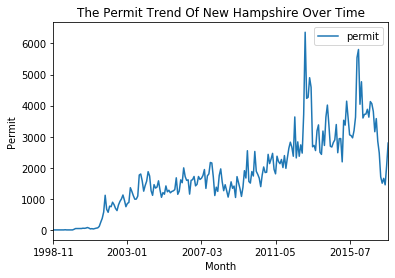

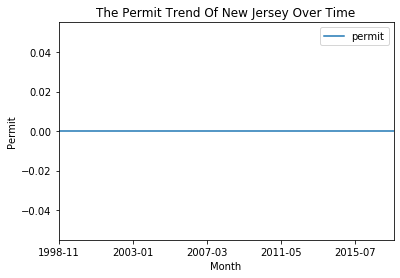

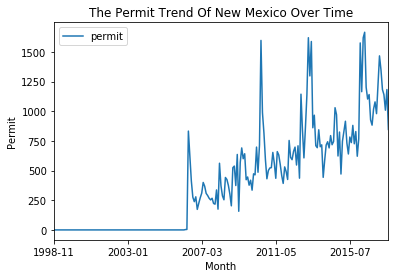

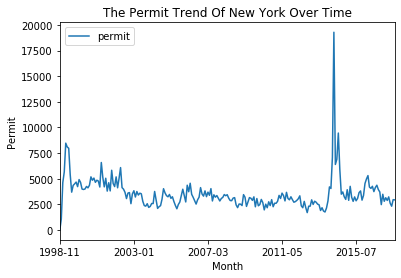

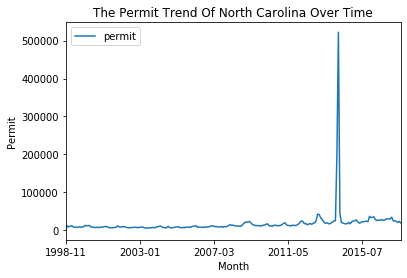

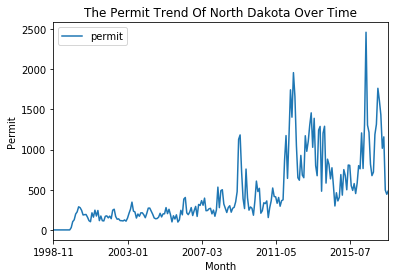

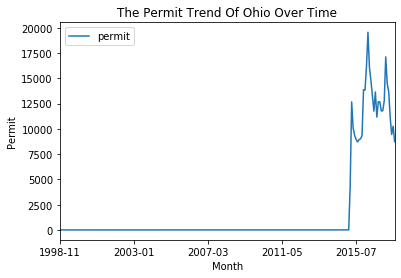

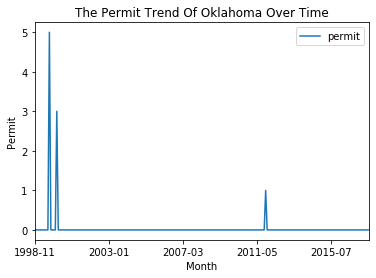

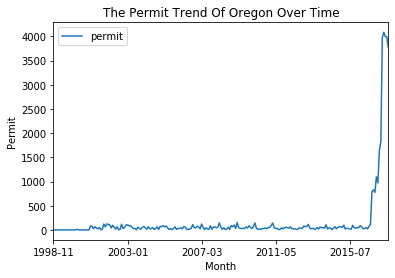

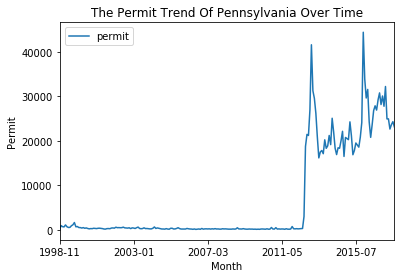

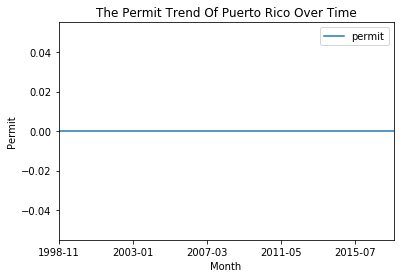

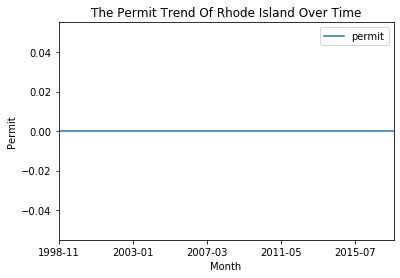

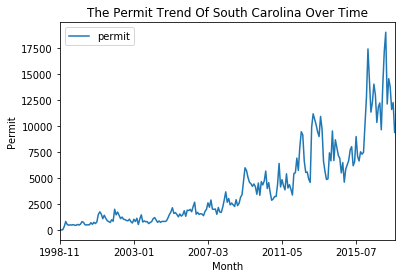

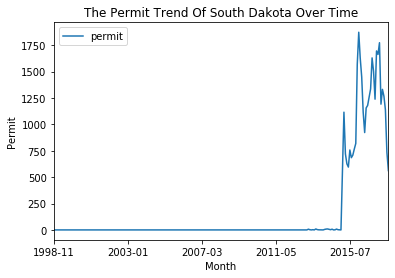

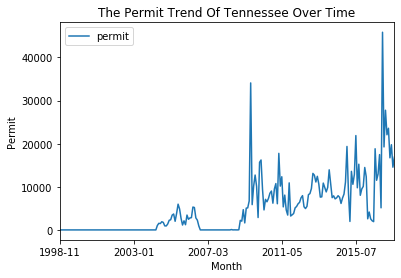

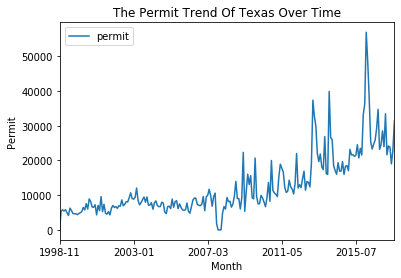

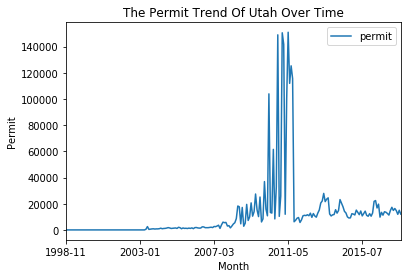

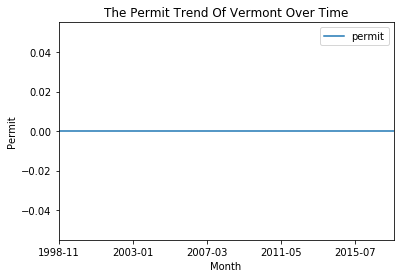

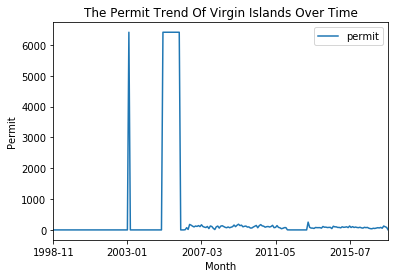

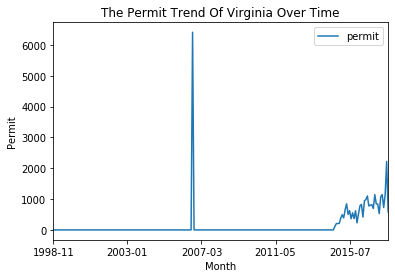

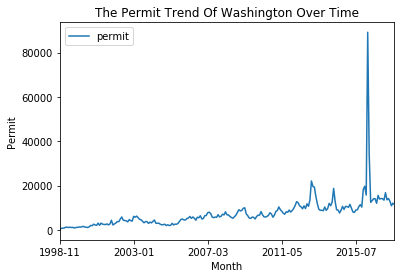

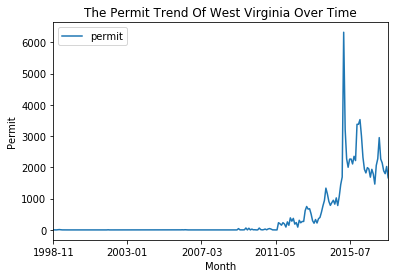

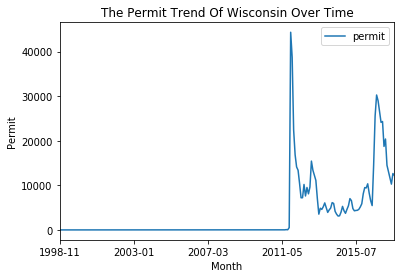

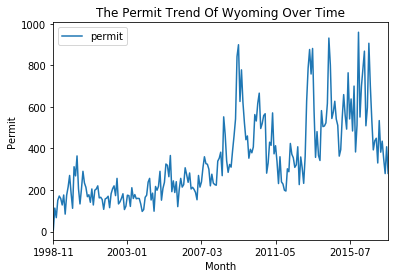

In [23]:
# Generating a states array
states_array=gun['state'].unique()

# Plotting permit over time for every state to chech the trend
for col in states_array:
    # Generate a temporary table for every state to plot it
    temp_table=gun.loc[gun['state'] == col,['state','month', 'permit']]
    temp_table.sort_values(by=['month'],inplace=True)
    temp_table.plot(kind='line',x='month',y='permit')
    plt.title("The Permit Trend Of "+col+" Over Time")     
    plt.ylabel("Permit")
    plt.xlabel("Month")
    plt.show()

> **Findings**: In general, all the states have an increnmental trend especially in 2015; except some states where data was 0 or maybe missed values: Guam, New Jersy,Puerto Rico,Rhode Island and Vermont.

<h4>Research Question 3: <i>What is the overall trend of gun purchases?</i></h4>

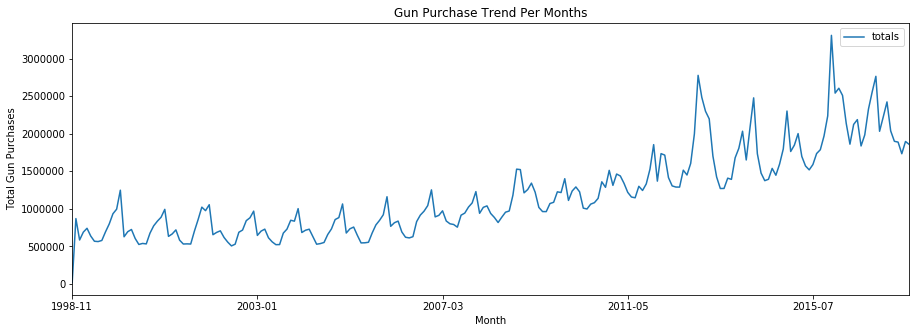

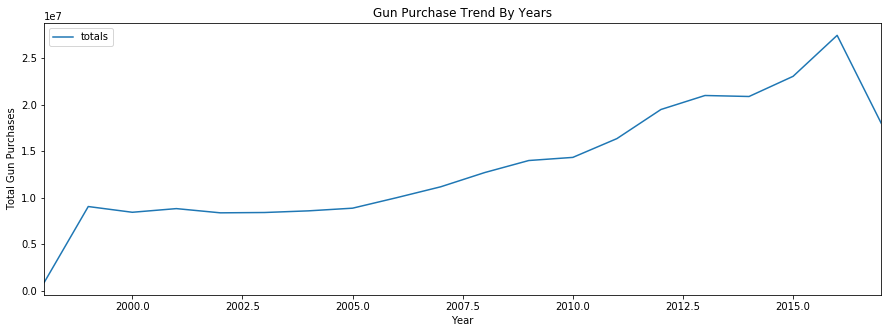

In [24]:
# I created two line charts that can be used to observe the change patten during the season:
# 1. A line chart for grouped data by year-months.
# 2. A line chart for grouped data by year.


#Assign figure size
plt.figure(figsize=(15,5))
gun.groupby('month')['totals'].sum().plot(kind='line',sharex=True, sharey=True, layout = (2, 1))

#set x and y axis lable name
plt.xlabel('Month')
plt.ylabel('Total Gun Purchases')

#set title and legend for the plot
plt.title("Gun Purchase Trend Per Months")
plt.legend()
plt.show()



#Assign figure size
plt.figure(figsize=(15,5))
gun.groupby('year')['totals'].sum().plot(kind='line',sharex=True, sharey=True, layout = (2, 1))

#set x and y axis lable name
plt.xlabel('Year')
plt.ylabel('Total Gun Purchases')

#set title and legend for the plot
plt.title("Gun Purchase Trend By Years")
plt.legend()
plt.show()


> **Findings**: After running the previous functions we found that the overall trend is incremental and it becomes faster over time; regarding to these line charts it can be noticed that from 1998 to 2016 the overall trend is incremental, add for that that is from 1999 to 2005 there was a semi-stable situation after that it becomes faster; note that from 2005 to 2016 it increased from about 10 million to 2.7 million.
Note: From 2016 to 2017, it goes down, which is being partially calculated due to only 9 months in 2017.
and going back to the line trend by months, I can see that the trend differs from month to another but still we have an incremental trend.

<h4>Research Question 4: <i>What are the gun types that have the highest and lowest purchasing amount?</i></h4>

In [25]:
# Define the gun type array
gun_type = {}

# Get the gun types columns
col_state = gun.columns[2:25]

# Do the required summation for every type
for c in col_state:
    gun_type[c] = gun[c].sum()
    
# Determine the gun type that has the highest purchasing amount
max(gun_type, key=gun_type.get)

'long_gun'

In [26]:
min(gun_type, key=gun_type.get)

'rentals_long_gun'

> **Findings**: After running the previous code I found that long gun type has the highest purchasing amount, while rentals_long_gun is the lowest one.


<h4>Research Question 5: <i>Which state has the highest percent of people under 18 years, (July 1, 2016), compare it with other states?</i></h4>

In [27]:
# creating list 
list =census.iloc[7, 2:].astype('float64')

# creating series 
series = pd.Series(list) 
  
# calling .nonzero() method  
result = series.to_numpy().nonzero() 

# retrieving values using iloc method 
value = series.iloc[result].astype('float64').idxmax(axis = 1)

# Get the highest percent of people under 18 years, (July 1, 2016)
data_value=census.iloc[7, 2:].loc[value]

# Print the result
print("{} has the highest percent of people under 18 years, (July 1, 2016) with a value {}".format(value,data_value))

utah has the highest percent of people under 18 years, (July 1, 2016) with a value 31.0


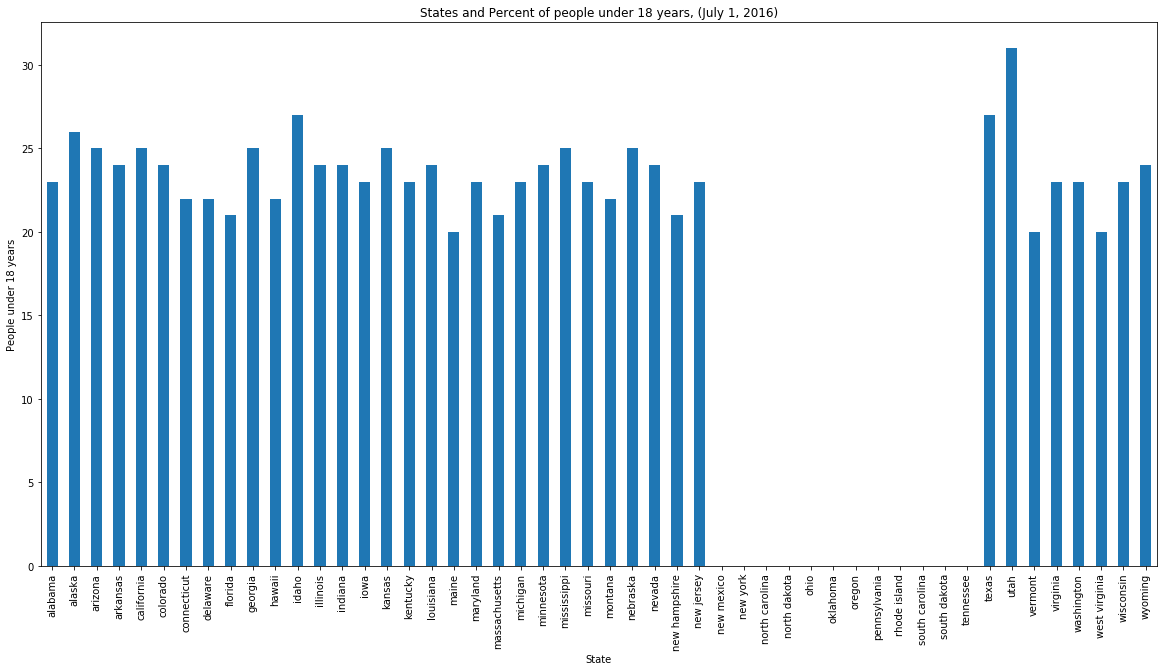

In [28]:
# Set figure size
plt.subplots(figsize=(20,10))

#plot function for the series
series.plot.bar()

# Assign title for the required plot
plt.title("States and Percent of people under 18 years, (July 1, 2016)")

# Set x and y axis lable name
plt.xlabel('State')
plt.ylabel('People under 18 years')

# Set axes properities for states values
plt.xticks(rotation=90,horizontalalignment='center',fontweight='light',fontsize='medium')

# Show plot
plt.show()

> **Findings**: After running the previous code I found that Utah has the highest percent of people under 18 years, (July 1, 2016) with a value 31%, I noticed that no relationship between the youth under 18 years and the permit that invistigated from the previous questions.


<h4>Research Question 6: <i>Which state has the lowest and highest percent for the females, (July 1, 2016), compare it with other states?</i></h4>

In [29]:
# In refrence to https://www.geeksforgeeks.org/python-pandas-series-nonzero-to-get-index-of-all-non-zero-values-in-a-series/ and https://github.com/facebook/prophet/issues/900


# Creating list 
list =census.iloc[11, 2:]#.astype('float64')
  
# Creating series 
series = pd.Series(list) 
  
# Calling .nonzero() method 
result = series.to_numpy().nonzero() 
  
# Retrieving values using iloc method 
value= series.iloc[result].astype('float64').idxmin(axis = 1)

# Get the lowest value for the females, (July 1, 2016)
data_value=census.iloc[11, 2:].loc[value]

# Print the result
print("{} has the lowest percent for the females, (July 1, 2016) with a value {}".format(value,data_value))


# Retrieving values using iloc method 
value = series.iloc[result].astype('float64').idxmax(axis = 1)


# Get the lowest value for the females, (July 1, 2016)
data_value=census.iloc[11, 2:].loc[value]


print("{} has the highest percent for the females, (July 1, 2016) with a value {}".format(value,data_value))

alaska has the lowest percent for the females, (July 1, 2016) with a value 48.0
alabama has the highest percent for the females, (July 1, 2016) with a value 51.0


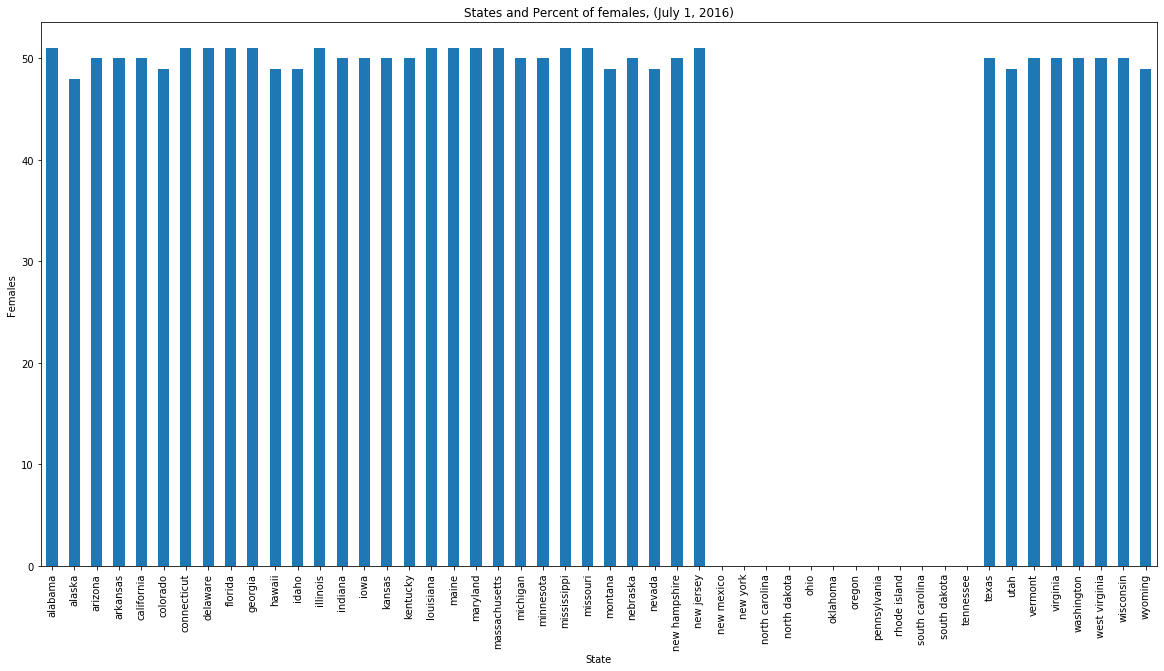

In [30]:
# Set figure size
plt.subplots(figsize=(20,10))

#plot function for the series
series.plot.bar()

# Assign title for the required plot
plt.title("States and Percent of females, (July 1, 2016)")

# Set x and y axis lable name
plt.xlabel('State')
plt.ylabel('Females')

# Set axes properities for states values
plt.xticks(rotation=90,horizontalalignment='center',fontweight='light',fontsize='medium')

# Show plot
plt.show()

> **Findings**: After running the previous code I found that Alaska has the lowest percent for the females, (July 1, 2016) with a value 48.0 while Alabama has the highest percent for the females, (July 1, 2016) with a value 51.0.


<h4>Research Question 7: <i>Which state has the highest percent of Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015, compare it with other states?</i></h4>

In [31]:
# creating list 
list =census.iloc[36, 2:].astype('float64')

# creating series 
series = pd.Series(list) 
  
# calling .nonzero() method  
result = series.to_numpy().nonzero() 

# retrieving values using iloc method 
value = series.iloc[result].astype('float64').idxmax(axis = 1)

# Get the highest percent of Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015
data_value=census.iloc[36, 2:].loc[value]

# Print the result
print("{} has the highest percent of Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015 with a value {}".format(value,data_value))

west virginia has the highest percent of Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015 with a value 14.0


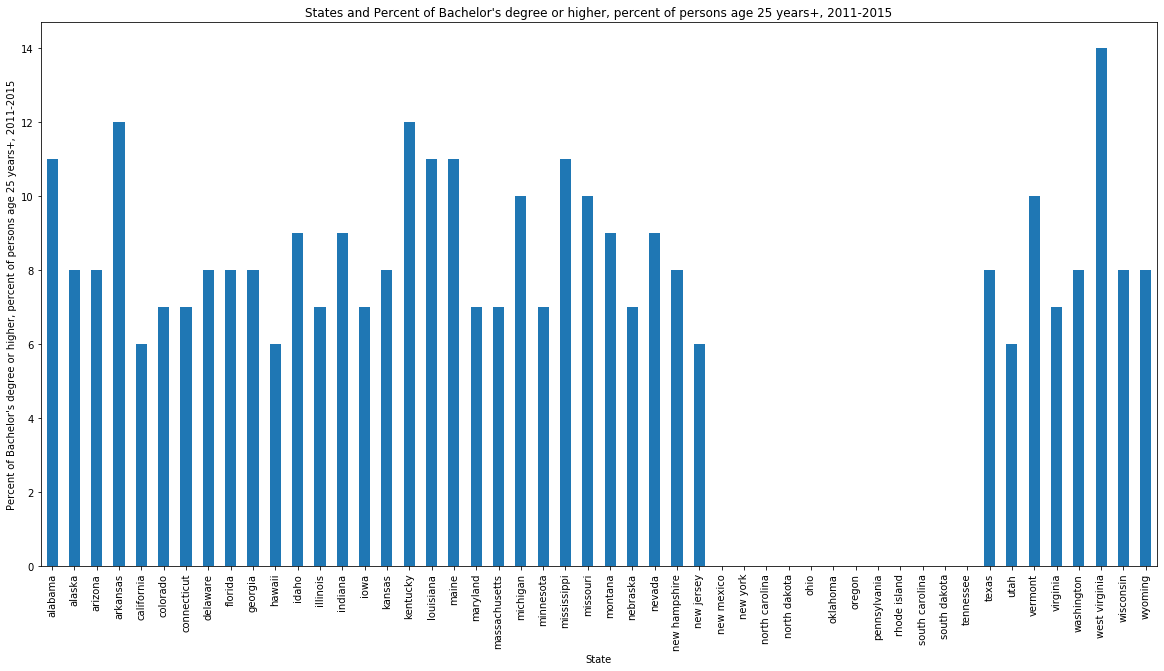

In [32]:
# Set figure size
plt.subplots(figsize=(20,10))

#plot function for the series
series.plot.bar()

# Assign title for the required plot
plt.title("States and Percent of Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015")

# Set x and y axis lable name
plt.xlabel('State')
plt.ylabel("Percent of Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015")

# Set axes properities for states values
plt.xticks(rotation=90,horizontalalignment='center',fontweight='light',fontsize='medium')

# Show plot
plt.show()

> **Findings**: After running the previous code I found that West Virginia has the highest percent of Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015 with a value 14.0, I noticed that West Virginia is one of the stetes that have minimum permit values, so maybe there is a relationship between the education degree and the permit that invistigated from the previous questions, this part needs more investigation and comparsion with other states.


<h4>Research Question 8: <i>What is the total annual payroll for all states, 2015 ($1,000)?</i></h4>

In [33]:
census.iloc[52, 2:].sum()

1531393139.0

> **Findings**: The total annual payroll of att states in 2015 is 1531393139 ($, 1000).


<h4>Research Question 9: <i>What is the highest total employment, 2015, compare it with other states?</i></h4>

In [34]:
# creating list 
list =census.iloc[51, 2:].astype('float64')

# creating series 
series = pd.Series(list) 
  
# calling .nonzero() method  
result = series.to_numpy().nonzero() 

# retrieving values using iloc method 
value = series.iloc[result].astype('float64').idxmax(axis = 1)

# Get the highest percent of Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015
data_value=census.iloc[51, 2:].loc[value]

# Print the result
print("{} has the highest total employment, 2015 with a value {}".format(value,data_value))

new york has the highest total employment, 2015 with a value 7998994.0


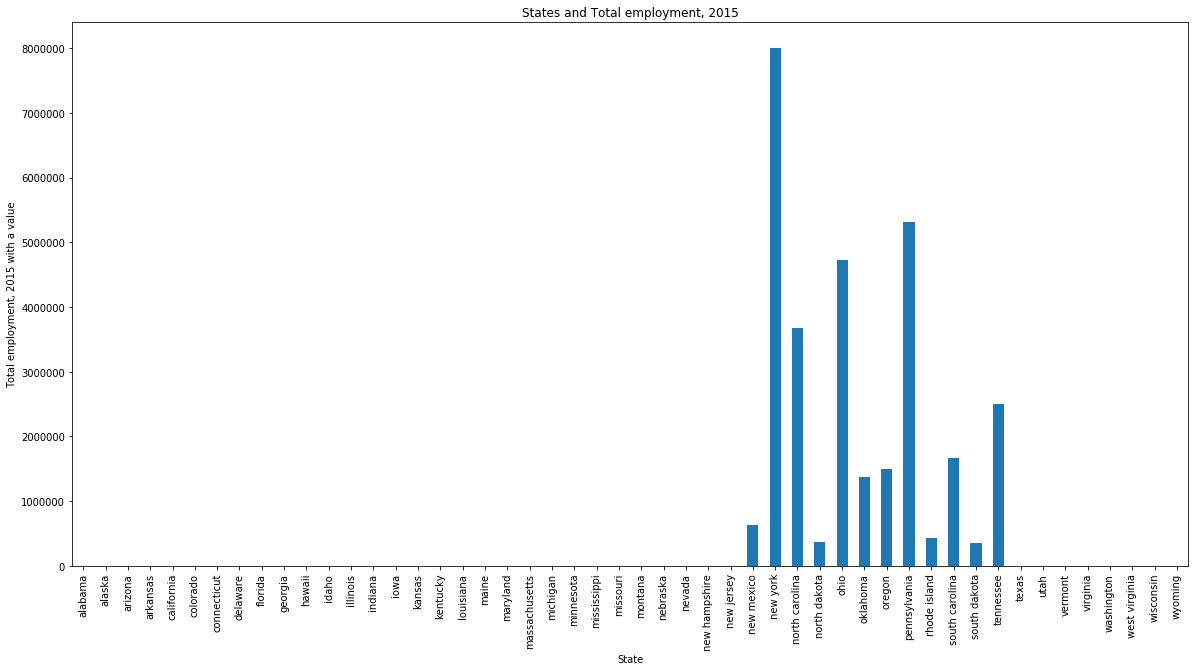

In [35]:
# Set figure size
plt.subplots(figsize=(20,10))

#plot function for the series
series.plot.bar()

# Assign title for the required plot
plt.title("States and Total employment, 2015")

# Set x and y axis lable name
plt.xlabel('State')
plt.ylabel("Total employment, 2015 with a value")

# Set axes properities for states values
plt.xticks(rotation=90,horizontalalignment='center',fontweight='light',fontsize='medium')

# Show plot
plt.show()

> **Findings**: After running the previous code I found that New York has the highest total employment, 2015 with a value 7998994, I noticed that New York is one of the stetes that have a minimum permit values, so maybe there is a relationship between the employment and the permit value that invistigated from the previous questions, this part needs more investigation and comparsion with other states.


<h4>Research Question 10: <i>What are the highest population per square mile, 2010, compare it with other states?</i></h4>

In [36]:
# Creating list 
list =census.iloc[64, 2:].astype('float64')

# Creating series 
series = pd.Series(list) 
  
# Calling .nonzero() method  
result = series.to_numpy().nonzero() 

# Retrieving values using iloc method 
value = series.iloc[result].astype('float64').idxmax(axis = 1)

# Get the highest percent of Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015
data_value=census.iloc[64, 2:].loc[value]

# Print the result
print("{} has the highest population per square mile, 2010 with a value {}".format(value,data_value))

wyoming has the highest population per square mile, 2010 with a value 56.0


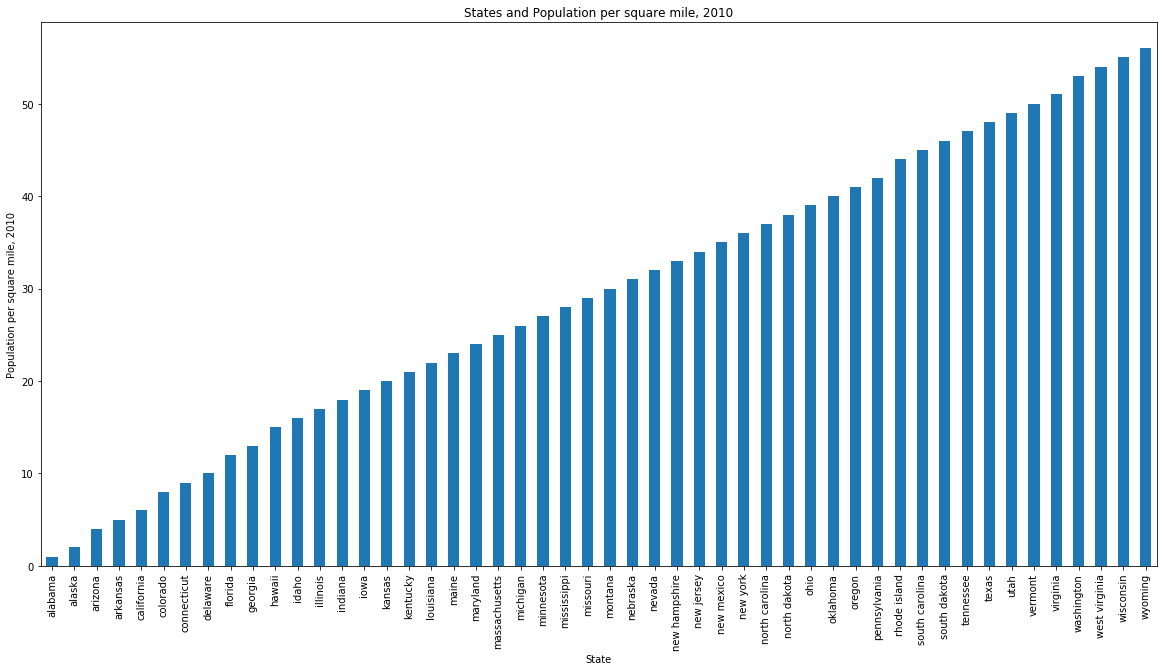

In [37]:
# Set figure size
plt.subplots(figsize=(20,10))

#plot function for the series
series.plot.bar()

# Assign title for the required plot
plt.title("States and Population per square mile, 2010")

# Set x and y axis lable name
plt.xlabel('State')
plt.ylabel("Population per square mile, 2010")

# Set axes properities for states values
plt.xticks(rotation=90,horizontalalignment='center',fontweight='light',fontsize='medium')

# Show plot
plt.show()

> **Findings**: After running the previous code I found that Wyoming has the highest population per square mile, 2010 with a value 56.0, I noticed that Wyoming have one of the lowest permit value, so maybe there is a relationship between the population per square mile and the permit value that invistigated from the previous questions, this part needs more investigation and comparsion with other states.



<h4>Research Question 11: <i>What census data is most associated with high gun per capita?</i></h4>

<p>
    For this question it must be answered as a combination between gun and census datasets, in other words needs to be answred via finding indicators that related to each other from both datasets; so it must be calculated by state which appeared from research question 2 that there is an increnmental trend especially in 2015; except some states where data was 0 or maybe missed values: Guam, New Jersy,Puerto Rico,Rhode Island and Vermont.
    </p>
    <p>
    In refrence to research question 1, I found that Kentucky have the highest permit in 2016-07; the results showed a frightening comparison of Kentucky with other states over the period!, after Kentucky: Illionois, California and Indiana; these have highest gun per capita in 2016-07.
    </p>
    <p>
    In the prevous questions I recomanded to do more deeper investigation for some factors, for example the population I noticed that most of the higher population have a minimum permit value!, also for the employement I found that New York has the highest total employment, 2015 with a value 7998994, I noticed that New York and the followed states have a minimum permit values!
</p>

In [38]:
# Gun permit

# Creating list 
temp_201607=gun.loc[gun['month'] == '2016-07',['permit','state']].reset_index(drop=True)

# Lower case for states fror merging in the next steps
temp_201607['state']=temp_201607['state'].str.lower()

# Remove rows that have 0 permit
temp_201607=temp_201607[(temp_201607 != 0).all(1)]


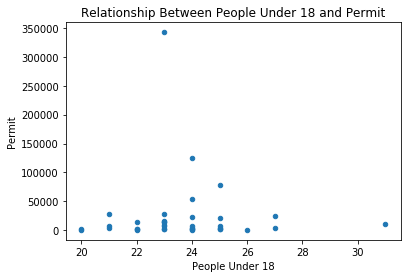

In [39]:
# People under 18

# Creating list 
list_undre18 =census.iloc[7, 2:].astype('float64')

# Creating series 
series_undre18 = pd.Series(list_undre18) 

# Append series to table header
series_undre18 = pd.DataFrame({'Under18':series_undre18.values,'state':series_undre18.index}).reset_index(drop=True)
series_undre18=series_undre18[(series_undre18 != 0).all(1)]


# Merge data from Census and Gun dataset
result = pd.merge(series_undre18, temp_201607, how='right', on=['state'])

# Drop NAN values that appeated
result=result.dropna()


result.plot(kind='scatter',x='Under18',y='permit')
plt.title("Relationship Between People Under 18 and Permit")     
plt.ylabel("Permit")
plt.xlabel("People Under 18")
plt.show()


> **Findings**: After running the previous code it seems that the distribution reflects a very weak relationship.

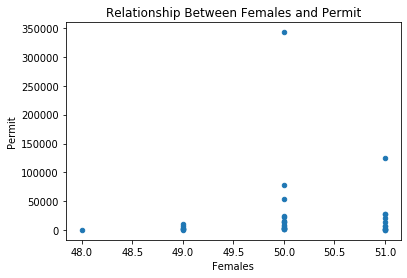

In [40]:
# Females

# Creating list 
list_females =census.iloc[11, 2:].astype('float64')
  
# Creating series 
series_females = pd.Series(list_females) 

# Append series to table header
series_females = pd.DataFrame({'Females':series_females.values,'state':series_females.index}).reset_index(drop=True)
series_females=series_females[(series_females != 0).all(1)]

# Merge data from Census and Gun dataset
result = pd.merge(series_females, temp_201607, how='right', on=['state'])

# Drop NAN values that appeated
result=result.dropna()

result.plot(kind='scatter',x='Females',y='permit')
plt.title("Relationship Between Females and Permit")     
plt.ylabel("Permit")
plt.xlabel("Females")
plt.show()

> **Findings**: After running the previous code it seems that the distribution reflects a very weak relationship.

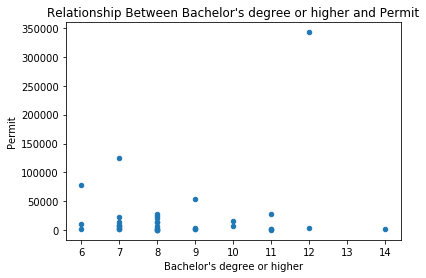

In [41]:
# Bachelor's degree or higher

# Creating list 
list_bacdeg =census.iloc[36, 2:].astype('float64')
  
# Creating series 
series_bacdeg = pd.Series(list_bacdeg) 

# Append series to table header
series_bacdeg = pd.DataFrame({"Bachelor's degree or higher":series_bacdeg.values,'state':series_bacdeg.index}).reset_index(drop=True)
series_bacdeg=series_bacdeg[(series_bacdeg != 0).all(1)]

# Merge data from Census and Gun dataset
result = pd.merge(series_bacdeg, temp_201607, how='right', on=['state'])

# Drop NAN values that appeated
result=result.dropna()

result.plot(kind='scatter',x="Bachelor's degree or higher",y='permit')
plt.title("Relationship Between Bachelor's degree or higher and Permit")     
plt.ylabel("Permit")
plt.xlabel("Bachelor's degree or higher")
plt.show()

> **Findings**: After running the previous code it seems that the distribution reflects a very weak relationship.

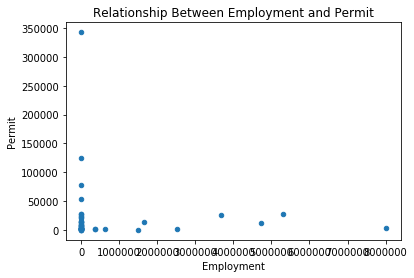

In [42]:
# Employment

# Creating list 
list_employment =census.iloc[51, 2:].astype('float64')
  
# Creating series 
series_employment = pd.Series(list_employment) 

# Append series to table header
series_employment = pd.DataFrame({"Employment":series_employment.values,'state':series_employment.index}).reset_index(drop=True)
series_employment=series_employment[(series_employment != 0).all(1)]

# Merge data from Census and Gun dataset
result = pd.merge(series_employment, temp_201607, how='right', on=['state'])

# Drop NAN values that appeated
result=result.dropna()

result.plot(kind='scatter',x="Employment",y='permit')
plt.title("Relationship Between Employment and Permit")     
plt.ylabel("Permit")
plt.xlabel("Employment")
plt.show()

> **Findings**: After running the previous code it seems that the distribution reflects a very weak relationship.

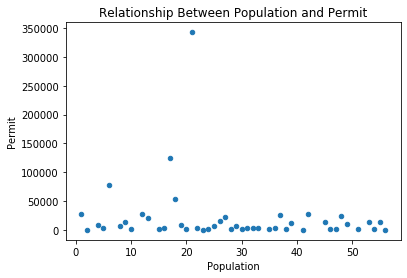

In [43]:
# Population

# Creating list 
list_population =census.iloc[64, 2:].astype('float64')
  
# Creating series 
series_population = pd.Series(list_population) 

# Append series to table header
series_population = pd.DataFrame({"Population":series_population.values,'state':series_population.index}).reset_index(drop=True)
series_population=series_population[(series_population != 0).all(1)]

# Merge data from Census and Gun dataset
result = pd.merge(series_population, temp_201607, how='right', on=['state'])

# Drop NAN values that appeated
result=result.dropna()

result.plot(kind='scatter',x="Population",y='permit')
plt.title("Relationship Between Population and Permit")     
plt.ylabel("Permit")
plt.xlabel("Population")
plt.show()

> **Findings**: After running the previous code it seems that the distribution reflects a very weak relationship.

<a id='conclusions'></a>
<h2>Conclusions</h2>

<p>
    For this Investigation, I got two seperated and independent dataset: Gun and Census, each dataset have its own measures, and the common between them is the states; Gun dataset ranging from NOV 1998 until SEP 2017, these datasets -Census and Gun- can be joined to check their relationship.
    I typed an 11 questions, I investigated them in this report; from the investigation questions one and two, Total Gun Purchases trend is an upward trend as it varies over time!
    </p>

<b>The limitations</b> of current investigation refers to uncompleted and uncontinous data in Census.

<b>Next time</b>
<ol>
    <li>Probablity distribution graphic can be used to see variable's distribution either normalized, right-skewed or left skewed and make prediction of missing value based on mean and standard deviation.</li>
    <li> Follow a clear datasets standardization before exploring can help show more clear and strong correlation between variables.</li>
</ol>

<b>In result</b>, the gun purchase has an incremental trend over the last years, some census varible has weak positive and negative association with gun registration.
